### Unsupervised Learning to Predict Plant's Health

This notebook showcases the application of Unsupervised Learning for classifying the plant's condition whether it is healthy or not-healthy based on Soil Moisture, Humidity and Temperature Data.

We are using K-Means clustering algorithm for making two clusters i.e healthy and not-healthy

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Cleaning Steps

Before further processing the sensor data must be cleaned as it contains over-bound values, NaN values and unusual values like 99.9 in humidity. 
<li>Over-Bound Values are handled by clipping the values in range.</li>
<li>NaN values are replaced by Mean Values.</li>
<li>Unusual Values like 99.9 are scaled down to range of 55 to 80.</li>

After cleaning the data is stored in a CSV.

### Preprocessing Steps

<ol type='1'>
    <li>Load Cleaned CSV. </li>
    <li>Select features like Moisture, Humidity, Temperature. </li>
    <li>Scale the values between -1 to 1 for better feature understanding and accurate processing.</li>
    <li>Using PCA for dimensionality reduction.</li>
</ol>

### Clustering Algorithm

We are using <strong>K-Means Clustering</strong> to create two clusters of healthy and not-healthy for about 300 iterations.

In [2]:
iot = pd.read_csv('cleaned_iot_data2.csv')
data = iot[['moisture_1', 'humidity_1', 'temperature_1']].values

# Scaling
standard_scaler = StandardScaler().fit(data)
x = standard_scaler.transform(data)
# Performing PCA
pca = PCA(n_components=2).fit(x)
pca_ouptut = pca.transform(x)

pca_df = pd.DataFrame()
pca_df['PCA1'] = pca_ouptut[:, 0]
pca_df['PCA2'] = pca_ouptut[:, 1]

x = pca_ouptut.copy()

#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2)
kmeans.fit(pca_df.values)

y_means = kmeans.predict(pca_df.values)
pca_df['target'] = y_means

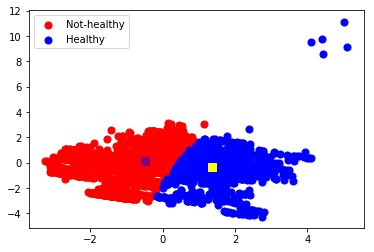

In [3]:
plt.scatter(pca_df[pca_df['target'] == 1]['PCA1'], pca_df[pca_df['target'] == 1]['PCA2'], s=50, c='red', label='Not-healthy')
plt.scatter(pca_df[pca_df['target'] == 0]['PCA1'], pca_df[pca_df['target'] == 0]['PCA2'], s=50, c='blue', label='Healthy')
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], s=80, c='yellow', marker='s')
plt.scatter(kmeans.cluster_centers_[1][0],  kmeans.cluster_centers_[1][1], s=80, c='purple', marker='s')
plt.legend()

In [4]:
'''
Workflow

1 --> Not Healthy
0 --> Healthy

Standard Scaler -> standard_scaler
PCA -> pca
Kmeans -> kmeans
'''
result = {
    1 : 'Not-Healthy',
    0 : 'Healthy' 
}

soil_moisture = 66 
humidity = 60 
temperature = 22 

scale = standard_scaler.transform(X=np.array([[soil_moisture, humidity, temperature]]))
pca_op = pca.transform(scale)
y = kmeans.predict(pca_op)
print('Prediction:', result[y[0]])

Prediction: Not-Healthy


c:\users\bhumit\anaconda3\envs\data_science\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
